数理モデル
- 対象を数学によって記述したモデル

例：定量化によるモデル化
- 学力→テストの点数
- 業績→KPI

では，
- 点数が良いから学力が身についているのか？
- KPIが改善されているにも関わらず，全く目標に近づいていない場合は何が起こっているのか？

課題
- 適切なモデルを構築する
- モデルと現実にはギャップがあることを受け入れた上で現場の意思決定に活用する技量が必要

数理最適化モデル
- 数ある選択肢の中から最敵な選択を見つける

**例：連立一次方程式を解いてみる**

>1個200円のりんごと1個150円のなしを合わせて10個かったら，代金の合計が1440円だった．
りんごとなしをそれぞれ何個買ったか？

(解答)
りんごの個数を$x$, なしの個数を$y$として連立一次方程式をたてると
$$
\left\{
\begin{array}{l}
\begin{align}
120x &+ 150y &= 1440 \\
x &+ y &= 10
\end{align}
\end{array}
\right.
$$
これを解くと$x=2$, $y=8$となるので，りんご2個，なしを8個買ったことが分かる．

In [1]:
import pulp

In [7]:
# Solve Simultaneous Linear Equations

""" 数理モデルの定義 """
problem = pulp.LpProblem(
    'SLE', # ここは任意の名前で良い
    pulp.LpMaximize) # 最大化問題を解く(今回は連立一次方程式を解くだけなので特に意味はない)

x = pulp.LpVariable('x', cat='Continuous') # 連続変数，実数値を取る
y = pulp.LpVariable('y', cat='Continuous')
""" 数理モデルに制約式を追加 """
# problem += 120*x + 150*y == 1440
# problem += x + y == 10
# こうもかける(僕はこっちのほうが好き)
problem.addConstraint(120*x + 150*y == 1440)
problem.addConstraint(x + y == 10)
""" 求解 """
status = problem.solve()

print(f"Status : {pulp.LpStatus[status]}") # 最適化計算をした結果，最適解(Optimal)が得られた
print(f"x = {x.value()}")
print(f"y = {y.value()}")

Status : Optimal
x = 2.0
y = 8.0


In [10]:
pulp.LpStatus

{0: 'Not Solved',
 1: 'Optimal',
 -1: 'Infeasible',
 -2: 'Unbounded',
 -3: 'Undefined'}

In [14]:
type(x)

pulp.pulp.LpVariable

**例：線形計画問題を解く**

- 高校数学でやった｢領域の最大･最小｣のこと

> ある工場では製品$p$と$q$を製造している．製品$p$と$q$を製造するには原料$m$と$n$が必要で，以下のことが分かっている.    
･製品$p$を1kg製造するには原料$m$が1kg，原料$n$が2kg必要    
･製品$q$を1kg製造するには原料$m$が3kg，原料$n$が1kg必要    
･原料$m$の在庫は30kg，原料$n$の在庫は40kg     
･単位量あたりの利得は，製品$p$は1万円，製品$q$は2万円    
この条件で利得を最大にするには，製品$p$と$q$をそれぞれ何kg製造すればよいか．

解答    

製品$p$の製造量を$x$kg，製品$q$の製造量を$y$kgとすると
$$
\left\{
\begin{array}{l}
\begin{align}
x + 3y \le 30 \\
2x + y \le 40 \\
x \ge 0, \ y \ge 0
\end{align}
\end{array}
\right.
$$
の条件をもとに，利得の合計$x+2y$を最大化すればよい．

これを解くと，$x=18$, $y=4$となるので，製品$p$を`18kg`，製品$q$を`4kg`製造すればよいことになる．

In [26]:
import numpy as np
import matplotlib.pyplot as plt

<ipython-input-83-0992f9174eae>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


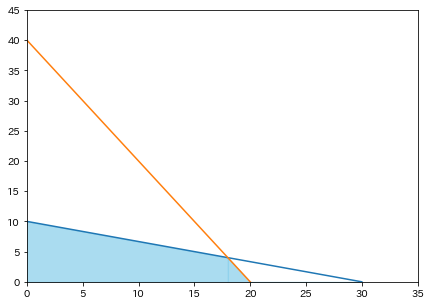

In [83]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(7,5))
x = np.linspace(0, 30, 1000)
y1 = lambda x : -(1/3)*x + 10
y2 = lambda x : -2*x + 40 
ax.plot(x, y1(x))
ax.plot(x, y2(x))
ax.fill_between(x, y1(x),where=x<=18,color='skyblue', alpha=0.7)
ax.fill_between(x, y2(x),where=y2(x)<=4,color='skyblue', alpha=0.7)
ax.set_ylim(0,45)
ax.set_xlim(0,35)
fig.show()

In [25]:
# Solve Linear Problem
problem = pulp.LpProblem('LP', pulp.LpMaximize)

x = pulp.LpVariable('x', cat='Continuous')
y = pulp.LpVariable('y', cat='Continuous')

problem.addConstraint(1*x + 3*y <= 30)
problem.addConstraint(2*x + 1*y <= 40)
problem.addConstraint(x >= 0)
problem.addConstraint(y >= 0)
problem.setObjective(x + 2*y)

status = problem.solve()

print(f"Status : {pulp.LpStatus[status]}")
print(f"x = {x.value()}")
print(f"y = {y.value()}")
print(f"obj = {problem.objective.value()}")

Status : Optimal
x = 18.0
y = 4.0
obj = 26.0
